In [ ]:
pip install -U ppscore

In [2]:
import pandas as pd
import numpy as np
import ppscore as pps

df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

In [4]:
df.head()

,x,error,y
0,-1.909815,-0.415450,3.231942
1,0.460573,-0.303007,-0.090880
2,-0.159170,-0.090920,-0.065585
3,1.821303,0.388303,3.705447
4,1.993395,-0.290585,3.683038


In [6]:
pps.score(df, "x", "y")

{'x': 'x',
 'y': 'y',
 'ppscore': 0.6769488273970952,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.0316935157281908,
 'model_score': 0.33328980002280556,
 'model': DecisionTreeRegressor()}

In [7]:
pps.predictors(df, "y")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.676949,regression,True,mean absolute error,1.031694,0.333290,DecisionTreeRegressor()
1,error,y,0.000000,regression,True,mean absolute error,1.031694,1.336392,DecisionTreeRegressor()


In [8]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.249395,0.333259,DecisionTreeRegressor()
2,x,y,0.676949,regression,True,mean absolute error,1.031694,0.333290,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,0.997415,1.334104,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.031694,1.336392,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,0.997415,1.067864,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.249395,0.278586,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


<AxesSubplot:xlabel='x', ylabel='ppscore'>

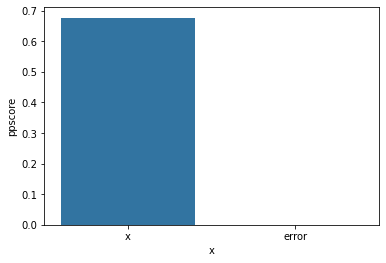

In [9]:
import seaborn as sns
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")

<AxesSubplot:xlabel='x', ylabel='y'>

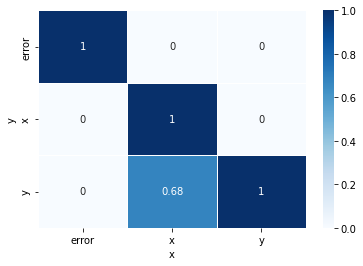

In [10]:
import seaborn as sns
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)